In [56]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import random as rnd
import warnings,datetime,os,calendar,csv,time

import pickle,h5py,json

import tensorflow as tf
import pandas as pd
import seaborn as sns

from keras.models import Model,Sequential
from keras.layers import Dense,LSTM,Conv2D,Dropout,BatchNormalization,Input,Concatenate,Add,Activation,MaxPooling2D,AveragePooling2D
import keras.backend as K

from sklearn import preprocessing as pp

from statsmodels.tsa.seasonal import seasonal_decompose

sns.set()
warnings.filterwarnings('ignore')

In [19]:
bf = pd.read_excel('..\\..\\TF_data\\ADMIN\\01\\20191003.xlsx')

bf['Buchungstag'] = pd.to_datetime(bf['Buchungstag'],format='%d.%m.%y')
bf['Valutadatum'] = pd.to_datetime(bf['Valutadatum'],format='%d.%m.%y')

In [35]:
df = bf[['Buchungstag','Valutadatum','Buchungstext','Verwendungszweck','Beguenstigter/Zahlungspflichtiger','Kontonummer/IBAN','Betrag']].rename(columns={
    'Valutadatum':'Date', 
    'Buchungstag':'Date_booked', 
    'Buchungstext':'Text', 
    'Verwendungszweck':'Use',
    'Beguenstigter/Zahlungspflichtiger':'CONTACT', 
    'Kontonummer/IBAN':'AccNum', 
    'Betrag':'Value'
})

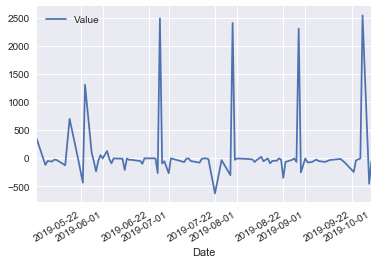

In [36]:
df[['Date','Value']].groupby(['Date']).sum().plot()

In [49]:
idx = pd.date_range(df['Date'].min(),df['Date'].max())

In [53]:
df0 = df[['Date','Value']].groupby(['Date']).sum().reindex(idx,fill_value=0)

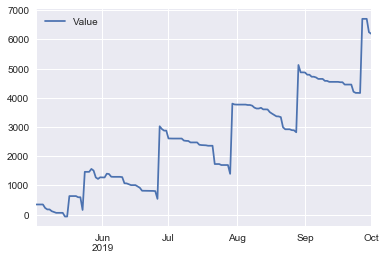

In [54]:
df0.cumsum().plot()

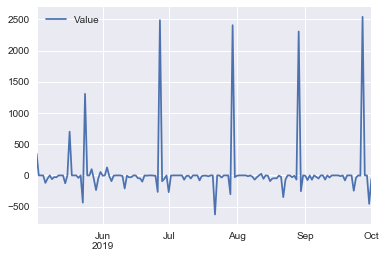

In [55]:
df0.plot()

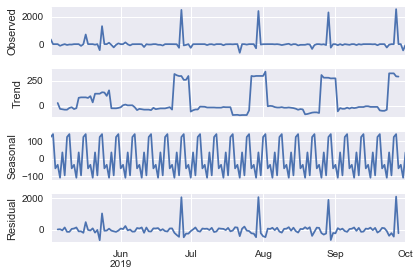

In [59]:
seasonal_decompose(df0).plot()
plt.show()

In [74]:
df1 = df[['Date','Text','CONTACT','AccNum','Value']]
df1['Count'] = 1

In [80]:
df1[['CONTACT','AccNum','Count','Value']].groupby(['CONTACT','AccNum']).sum().sort_values(by='Count',ascending=False)

,,Count,Value
CONTACT,AccNum,,
AMAZON INSTANT VIDEO GERMANY GMBH,DE07300308800013011001,41,-215.55
"PayPal (Europe) S.a.r.l. et Cie., S.C.A.",DE88500700100175526303,10,-210.82
KREDITKARTENABRECHNUNG,9902292060,6,-1856.98
IGM Erlangen,DE28500500000083044008,5,-10.25
M-net Telekommunikations GmbH,DE74700500000000028273,5,-149.50
SCHAEFER NOHE SAGT DANKE//ERLANGEN/DE,DE46370100500018299505,5,-399.00
Telekom Deutschland GmbH Landgrabenweg 151,DE68700202700667302269,5,-307.63
SLF Sportland Franken GmbH & Co. KG,DE88763500000000062725,5,-124.50
Elaine Fernandez,DE46763500000044116613,5,-1175.00


In [92]:
df[df['CONTACT'].apply(lambda x: 'fitness' in str(x).lower())]

,Date_booked,Date,Text,Use,CONTACT,AccNum,Value
